In [135]:
library(dplyr)
library(ggplot2)

df.hbw <- read.csv(paste("C:/Users/kevin/Desktop/",
                     "USP_587_data/HW2/household_hbw.csv", sep=""))

## Avg HBW Trips by HHWork and Licensed Drivers

In [234]:
# HH Size only
df.wrklic <- df.hbw %>%
    select(hhlic, hhwrk, hbw) %>%
    mutate(hhwrk = recode(hhwrk, `0`=0, `1`=1, `2`=2, `3`=3, `4`=3, `5`=3)) %>%
    mutate(hhlic = recode(hhlic, `0`=0, `1`=1, `2`=2, `3`=3, `4`=4, `5`=4, `6`=4, `7`=4)) %>%
    filter(hhwrk > 0 & hhlic > 0) %>%
    group_by(hhwrk, hhlic) %>%
    mutate(avg_trips = mean(hbw))

summarize(df.wrklic, avg_trips = mean(hbw))

df.wrklic$ResError <- (df.wrklic$hbw - df.wrklic$avg_trips)^2
df.wrklic$TotError <- (df.wrklic$hbw - mean(df.wrklic$hbw))^2
SSE <- sum(df.wrklic$ResError)
SST <- sum(df.wrklic$TotError)
R2 <- 1 - (SSE/SST)

print(paste("SSE =", SSE, sep=" "))
print(paste("SST =", SST, sep=" "))
print(paste("R2 =", R2, sep=" "))
print(paste("Adj R2 =", adj.R2, sep=" "))

k <- 8
n <- nrow(df.wrklic)
print(paste("n =", n, sep=" "))
adj.R2 <- R2 - ((1 - R2)*(k - 1) / (n - k - 1))

pers.fit <- lm(hbw ~ factor(hhwrk) * factor(hhlic), data=df.wrklic)
summary(pers.fit)

hhwrk,hhlic,avg_trips
1,1,0.5022388
1,2,0.5830904
1,3,0.6000000
1,4,0.5714286
2,1,0.7654321
2,2,1.0701999
2,3,1.2298851
2,4,1.2272727
3,1,0.6666667
3,2,1.1538462


[1] "SSE = 3308.87909007614"
[1] "SST = 3917.58631008042"
[1] "R2 = 0.155378126178867"
[1] "Adj R2 = 0.154270529116906"
[1] "n = 5347"



Call:
lm(formula = hbw ~ factor(hhwrk) * factor(hhlic), data = df.wrklic)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8621 -0.5831 -0.0702  0.4978  3.9298 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    0.50224    0.02151  23.345  < 2e-16 ***
factor(hhwrk)2                 0.26319    0.09011   2.921  0.00351 ** 
factor(hhwrk)3                 0.16443    0.45520   0.361  0.71795    
factor(hhlic)2                 0.08085    0.03264   2.477  0.01329 *  
factor(hhlic)3                 0.09776    0.09064   1.079  0.28083    
factor(hhlic)4                 0.06919    0.21158   0.327  0.74366    
factor(hhwrk)2:factor(hhlic)2  0.22392    0.09493   2.359  0.01837 *  
factor(hhwrk)3:factor(hhlic)2  0.40633    0.46876   0.867  0.38608    
factor(hhwrk)2:factor(hhlic)3  0.36669    0.13509   2.714  0.00666 ** 
factor(hhwrk)3:factor(hhlic)3  0.83910    0.46657   1.798  0.07216 .  
factor(hhwrk)2:factor(hhlic)4  0.39

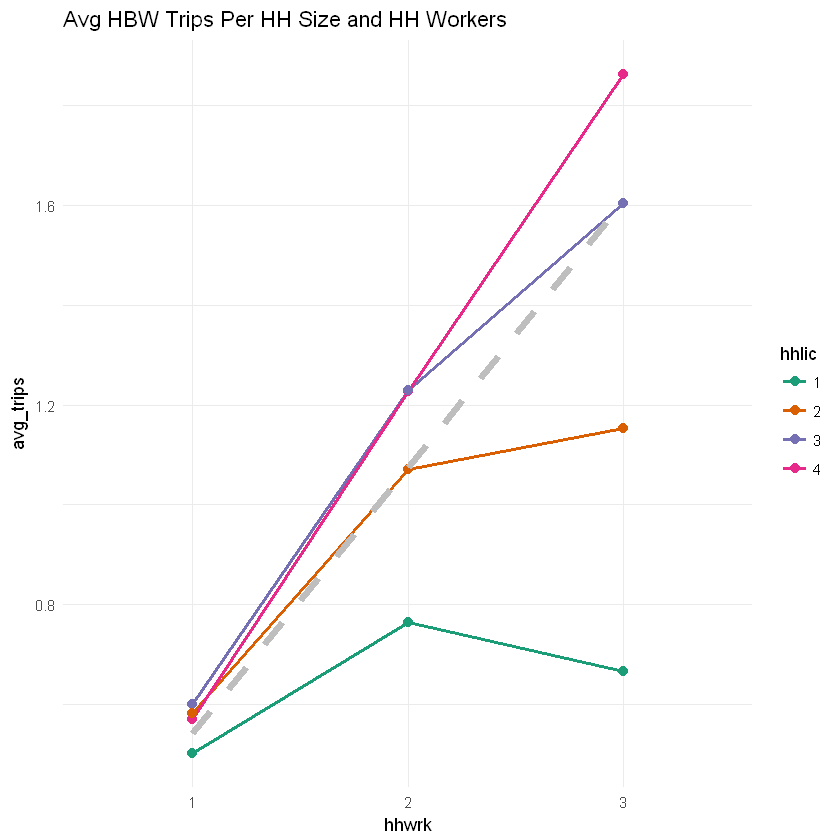

In [235]:
# Graph Avg Trips by # Workers
df.wrklic$hhwrk <- as.factor(df.wrklic$hhwrk)
df.wrklic$hhlic <- as.factor(df.wrklic$hhlic)


df.wrklic %>%
    ggplot(aes(x=hhwrk, y=avg_trips, color=hhlic)) + 
    theme_minimal() +
    geom_line(aes(x=hhwrk, y=avg_trips, color=hhlic, group=hhlic), size=1) +
    geom_point(size=2.5) +
    stat_smooth(method=lm, se=FALSE, linetype="dashed", aes(group=1), 
                size=2, color="gray") +
    labs(title= "Avg HBW Trips Per HH Size and HH Workers") +
    scale_color_brewer(palette="Dark2")

##  AVG TRIPS by HH Size Presence of Non-workers

In [180]:
# HH Size only
df.nonwrk <- df.hbw %>%
    select(hhsiz, hhwrk, hbw) %>%
    mutate(nonwrk = ifelse(hhsiz > hhwrk, 1, 0)) %>%
    mutate(hhsiz = recode(hhsiz, `1`=1, `2`=2, `3`=3, `4`=4, `5`=4, `6`=4, `7`=4, `8`=4)) %>%
    filter(hhwrk > 0) %>%
    group_by(hhsiz, nonwrk) %>%
    mutate(avg_trips = mean(hbw))

summarize(df.nonwrk, avg_trips = mean(hbw))

df.nonwrk$ResError <- (df.nonwrk$hbw - df.nonwrk$avg_trips)^2
df.nonwrk$TotError <- (df.nonwrk$hbw - mean(df.nonwrk$hbw))^2
SSE <- sum(df.nonwrk$ResError)
SST <- sum(df.nonwrk$TotError)
R2 <- 1 - (SSE/SST)

print(paste("SSE =", SSE, sep=" "))
print(paste("SST =", SST, sep=" "))
print(paste("R2 =", R2, sep=" "))
print(paste("Adj R2 =", adj.R2, sep=" "))

k <- 6
n <- nrow(df.nonwrk)
print(paste("n =", n, sep=" "))
adj.R2 <- R2 - ((1 - R2)*(k - 1) / (n - k - 1))

pers.fit <- lm(hbw ~ factor(nonwrk) * factor(hhsiz), data=df.nonwrk)
summary(pers.fit)

hhsiz,nonwrk,avg_trips
1,0,0.5025381
2,0,1.0689115
2,1,0.5240964
3,0,1.5786164
3,1,0.9001350
4,0,1.9000000
4,1,1.0520231


[1] "SSE = 3508.24607053155"
[1] "SST = 3968.93572744015"
[1] "R2 = 0.116073851668474"
[1] "Adj R2 = 0.115258872737687"
[1] "n = 5430"



Call:
lm(formula = hbw ~ factor(nonwrk) * factor(hhsiz), data = df.nonwrk)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9000 -0.5241 -0.0520  0.4975  4.0999 

Coefficients: (1 not defined because of singularities)
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     0.50254    0.02339  21.481  < 2e-16 ***
factor(nonwrk)1                -0.84798    0.14865  -5.704 1.23e-08 ***
factor(hhsiz)2                  0.56637    0.03246  17.446  < 2e-16 ***
factor(hhsiz)3                  1.07608    0.06794  15.838  < 2e-16 ***
factor(hhsiz)4                  1.39746    0.14870   9.398  < 2e-16 ***
factor(nonwrk)1:factor(hhsiz)2  0.30316    0.15292   1.982   0.0475 *  
factor(nonwrk)1:factor(hhsiz)3  0.16950    0.16444   1.031   0.3027    
factor(nonwrk)1:factor(hhsiz)4       NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8043 on 5423 degrees of freedom

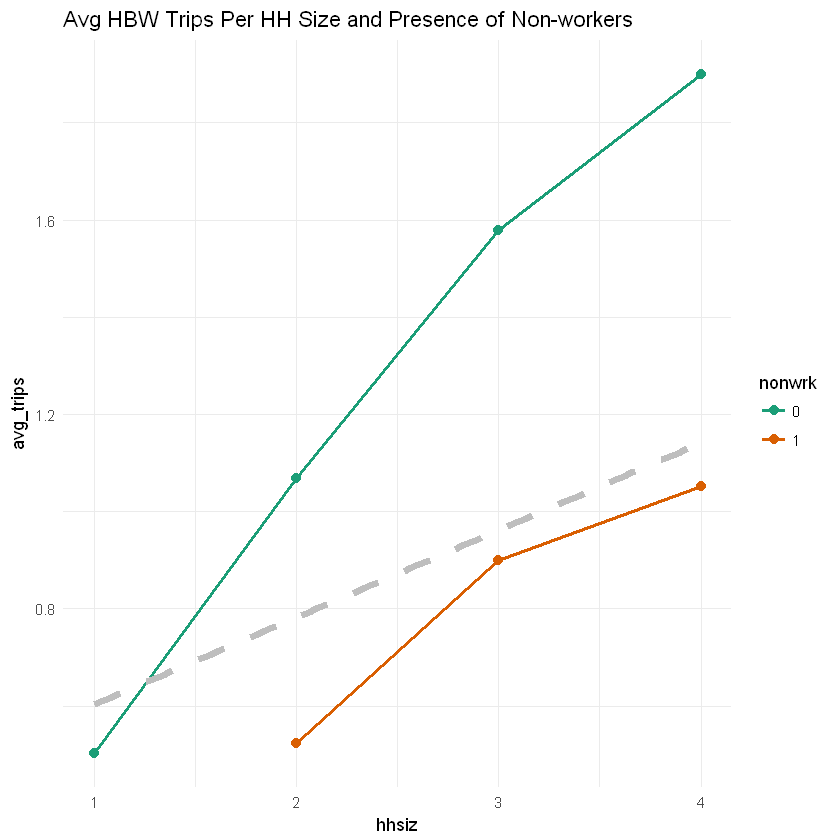

In [184]:
df.nonwrk$hhwrk <- as.factor(df.nonwrk$hhwrk)
df.nonwrk$nonwrk <- as.factor(df.nonwrk$nonwrk)


df.nonwrk %>%
    ggplot(aes(x=hhsiz, y=avg_trips, color=nonwrk)) + 
    theme_minimal() +
    geom_line(aes(x=hhsiz, y=avg_trips, color=nonwrk, group=nonwrk), size=1) +
    geom_point(size=2.5) +
    stat_smooth(method=lm, se=FALSE, linetype="dashed", aes(group=1), 
                size=2, color="gray") +
    labs(title= "Avg HBW Trips Per HH Size and Presence of Non-workers") +
    scale_color_brewer(palette="Dark2")

##  AVG TRIPS by Workers and Household Vehicles

In [209]:
df.persveh <- df.hbw %>%
    select(hhwrk, hhveh, hbw) %>%
    mutate(hhwrk = recode(hhwrk, `0`=0, `1`=1, `2`=2, `3`=3, `4`=3, `5`=3)) %>%
    mutate(hhveh = recode(hhveh, `0`=0, `1`=1, `2`=1, `3`=1, `4`=1, `5`=1, 
                          `6`=1, `7`=1, `8`=1)) %>%
    filter(hhwrk > 0) %>%
    group_by(hhwrk, hhveh) %>%
    mutate(avg_trips = mean(hbw))

summarize(df.persveh, avg_trips = mean(hbw))

# Manual Error calcs
df.persveh$ResError <- (df.persveh$hbw - 
                           df.persveh$avg_trips)^2
df.persveh$TotError <- (df.persveh$hbw - 
                           mean(df.persveh$hbw))^2
SSE <- sum(df.persveh$ResError)
SST <- sum(df.persveh$TotError)
R2 <- 1 - (SSE/SST)
k <- 6
n <- nrow(df.persveh)
adj.R2 <- R2 - ((1 - R2) * (k - 1) / (n - k - 1))

print(paste("SSE =", SSE, sep=" "))
print(paste("SST =", SST, sep=" "))
print(paste("R2 =", R2, sep=" "))
print(paste("adj R2 =", adj.R2, sep=" "))
print(paste("n =", n, sep=" "))

df.persveh.fit <- lm(hbw ~ factor(hhwrk) * factor(hhveh), data=df.persveh)
summary(df.persveh.fit)

hhwrk,hhveh,avg_trips
1,0,0.2716049
1,1,0.5460277
2,0,0.7222222
2,1,1.0813205
3,0,1.0000000
3,1,1.5951087


[1] "SSE = 3357.22603168052"
[1] "SST = 3968.93572744015"
[1] "R2 = 0.154124364254738"
[1] "adj R2 = 0.153344467854456"
[1] "n = 5430"



Call:
lm(formula = hbw ~ factor(hhwrk) * factor(hhveh), data = df.persveh)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5951 -0.5460 -0.0813  0.4540  3.9187 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    0.27160    0.06181   4.394 1.13e-05 ***
factor(hhwrk)2                 0.45062    0.14496   3.109  0.00189 ** 
factor(hhwrk)3                 0.72840    0.78916   0.923  0.35605    
factor(hhveh)1                 0.27442    0.06388   4.296 1.77e-05 ***
factor(hhwrk)2:factor(hhveh)1  0.08468    0.14671   0.577  0.56385    
factor(hhwrk)3:factor(hhveh)1  0.32069    0.79039   0.406  0.68496    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7867 on 5424 degrees of freedom
Multiple R-squared:  0.1541,	Adjusted R-squared:  0.1533 
F-statistic: 197.7 on 5 and 5424 DF,  p-value: < 2.2e-16


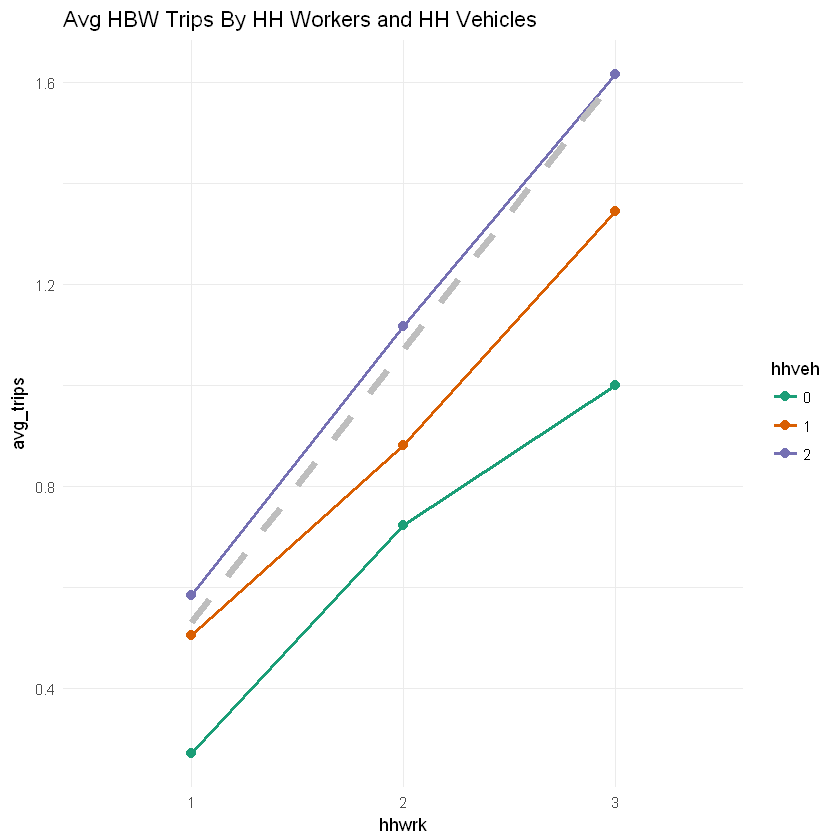

In [161]:
df.persveh$hhveh <- as.factor(df.persveh$hhveh)
df.persveh$hhwrk <- as.factor(df.persveh$hhwrk)


df.persveh %>%
    ggplot(aes(x=hhwrk, y=avg_trips, color=hhveh)) + 
    theme_minimal() +
    geom_line(aes(x=hhwrk, y=avg_trips, color=hhveh, group=hhveh), size=1) +
    geom_point(size=2.5) +
    stat_smooth(method=lm, se=FALSE, linetype="dashed", aes(group=1), 
                size=2, color="gray") +
    labs(title= "Avg HBW Trips By HH Workers and HH Vehicles") +
    scale_color_brewer(palette="Dark2")

In [160]:
df.persveh <- df.hbw %>%
    select(hhwrk, hhveh, hbw) %>%
    mutate(hhwrk = recode(hhwrk, `0`=0, `1`=1, `2`=2, `3`=3, `4`=3, `5`=3)) %>%
    mutate(hhveh = recode(hhveh, `0`=0, `1`=1, `2`=2, `3`=2, `4`=2, `5`=2, 
                          `6`=1, `7`=1, `8`=1)) %>%
    filter(hhwrk > 0) %>%
    group_by(hhwrk, hhveh) %>%
    mutate(avg_trips = mean(hbw))

summarize(df.persveh, avg_trips = mean(hbw))

# Manual Error calcs
df.persveh$ResError <- (df.persveh$hbw - 
                           df.persveh$avg_trips)^2
df.persveh$TotError <- (df.persveh$hbw - 
                           mean(df.persveh$hbw))^2
SSE <- sum(df.persveh$ResError)
SST <- sum(df.persveh$TotError)
R2 <- 1 - (SSE/SST)
k <- 9
n <- nrow(df.persveh)
adj.R2 <- R2 - ((1 - R2) * (k - 1) / (n - k - 1))

print(paste("SSE =", SSE, sep=" "))
print(paste("SST =", SST, sep=" "))
print(paste("R2 =", R2, sep=" "))
print(paste("adj R2 =", adj.R2, sep=" "))

df.persveh.fit <- lm(hbw ~ factor(hhwrk) * factor(hhveh), data=df.persveh)
summary(df.persveh.fit)

hhwrk,hhveh,avg_trips
1,0,0.2716049
1,1,0.5060554
1,2,0.5838103
2,0,0.7222222
2,1,0.8817204
2,2,1.1164773
3,0,1.0000000
3,1,1.3448276
3,2,1.6165192


[1] "SSE = 3334.23016798233"
[1] "SST = 3968.93572744015"
[1] "R2 = 0.159918326484764"
[1] "adj R2 = 0.158678353534926"



Call:
lm(formula = hbw ~ factor(hhwrk) * factor(hhveh), data = df.persveh)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6165 -0.5838 -0.1165  0.4939  4.1183 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    0.27160    0.06162   4.408 1.06e-05 ***
factor(hhwrk)2                 0.45062    0.14450   3.118 0.001828 ** 
factor(hhwrk)3                 0.72840    0.78667   0.926 0.354530    
factor(hhveh)1                 0.23445    0.06579   3.563 0.000369 ***
factor(hhveh)2                 0.31221    0.06557   4.761 1.97e-06 ***
factor(hhwrk)2:factor(hhveh)1 -0.07495    0.15188  -0.494 0.621678    
factor(hhwrk)3:factor(hhveh)1  0.11038    0.80037   0.138 0.890319    
factor(hhwrk)2:factor(hhveh)2  0.08205    0.14723   0.557 0.577345    
factor(hhwrk)3:factor(hhveh)2  0.30431    0.78814   0.386 0.699427    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7843 on 54

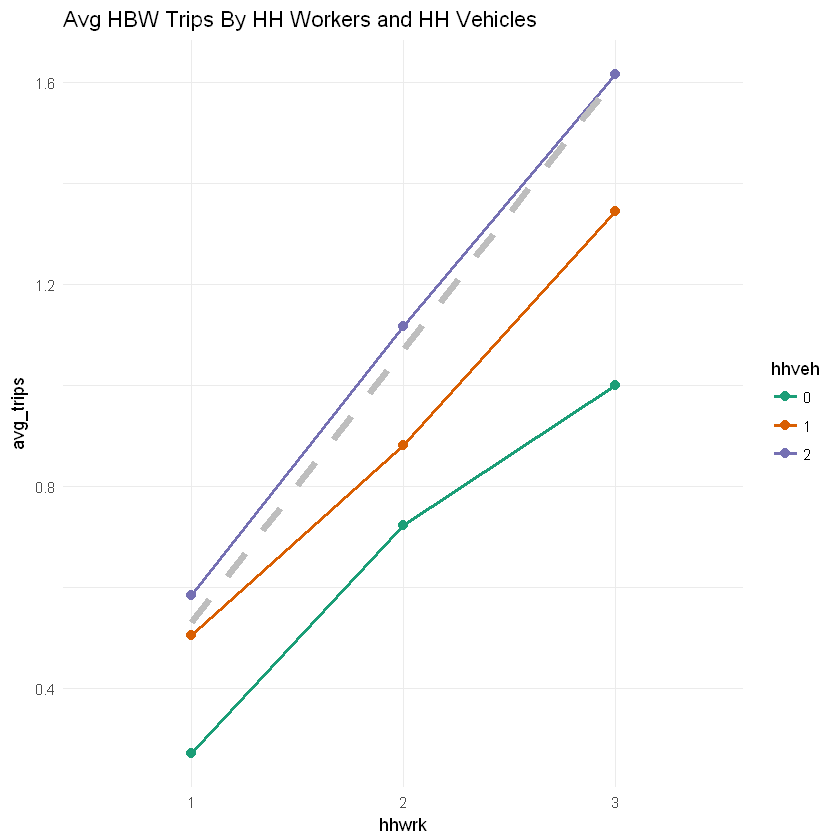

In [159]:
df.persveh$hhveh <- as.factor(df.persveh$hhveh)
df.persveh$hhwrk <- as.factor(df.persveh$hhwrk)


df.persveh %>%
    ggplot(aes(x=hhwrk, y=avg_trips, color=hhveh)) + 
    theme_minimal() +
    geom_line(aes(x=hhwrk, y=avg_trips, color=hhveh, group=hhveh), size=1) +
    geom_point(size=2.5) +
    stat_smooth(method=lm, se=FALSE, linetype="dashed", aes(group=1), 
                size=2, color="gray") +
    labs(title= "Avg HBW Trips By HH Workers and HH Vehicles") +
    scale_color_brewer(palette="Dark2")

In [ ]:
((3441.9 - 3400.3)/ (9-6)) / (3400.3/(6449-9-1))